# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [4]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


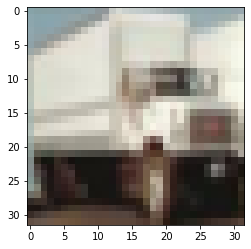

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [7]:
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [8]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [10]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [12]:
from tensorflow.keras.optimizers import RMSprop

batch_size = 32

opt = RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 27s 16ms/step - loss: 1.7562 - accuracy: 0.3588 - val_loss: 1.5061 - val_accuracy: 0.4575
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4716 - accuracy: 0.4684 - val_loss: 1.3693 - val_accuracy: 0.5078
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3514 - accuracy: 0.5172 - val_loss: 1.2533 - val_accuracy: 0.5465
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2855 - accuracy: 0.5410 - val_loss: 1.1693 - val_accuracy: 0.5878
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2276 - accuracy: 0.5654 - val_loss: 1.2180 - val_accuracy: 0.5842
Epoch 6/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1904 - accuracy: 0.5825 - val_loss: 1.1437 - val_accuracy: 0.5924
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1631 - accuracy: 0.5886 - val_loss: 1.0593 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [40]:
model_new = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_new.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_new.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_new.add(Conv2D(32, (5, 5), strides = (1,1)))
model_new.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_new.add(MaxPooling2D(pool_size=(2, 2)))

## 5x5 convolution with 2x2 stride and 32 filters
model_new.add(Conv2D(32, (5, 5), strides = (1,1)))
model_new.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_new.add(Conv2D(32, (5, 5), strides = (1,1)))
model_new.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_new.add(MaxPooling2D(pool_size=(2, 2)))

## Flatten turns 3x3x32 into 288x1
model_new.add(Flatten())
model_new.add(Dense(512))
model_new.add(Activation('relu'))
model_new.add(Dense(num_classes))
model_new.add(Activation('softmax'))

model_new.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 activation_56 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_93 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 activation_57 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 10, 10, 32)        25632     
                                                     

total parameters of our new model is: Total params: 232,426

Compared to the old model which is at: 181,162 parameters

There is a significant increase in our parameters for the new model. 

In [41]:
from tensorflow.keras.optimizers import RMSprop

batch_size = 32

opt = RMSprop(lr=0.0005)


model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_new.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 223s 142ms/step - loss: 1.6089 - accuracy: 0.4156 - val_loss: 1.3174 - val_accuracy: 0.5253
Epoch 2/5
1563/1563 [==============================] - 258s 165ms/step - loss: 1.2060 - accuracy: 0.5713 - val_loss: 1.1276 - val_accuracy: 0.5967
Epoch 3/5
1563/1563 [==============================] - 262s 168ms/step - loss: 1.0351 - accuracy: 0.6349 - val_loss: 1.0059 - val_accuracy: 0.6415
Epoch 4/5
1563/1563 [==============================] - 261s 167ms/step - loss: 0.9143 - accuracy: 0.6788 - val_loss: 1.1519 - val_accuracy: 0.6155
Epoch 5/5
1563/1563 [==============================] - 262s 168ms/step - loss: 0.8330 - accuracy: 0.7086 - val_loss: 0.9426 - val_accuracy: 0.6877


model 1 metrics: 
* loss: 1.0848 
* accuracy: 0.6283 
* val_loss: 1.0163 
* val_accuracy: 0.6536


new_model metrics: 
* loss: 0.8330 
* accuracy: 0.7086 
* val_loss: 0.9426 
* val_accuracy: 0.6877

training accuracy improved by almost %8 whereas the validation accuracy only improved by %3 

In my opinion our model is not worth it given its very slow learning time.

### tweaking the parameters of the model_new CNN

In [42]:
from tensorflow.keras.optimizers import Adam

batch_size = 32

opt = Adam(lr=0.0001)


model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_new.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 239s 153ms/step - loss: 0.6321 - accuracy: 0.7793 - val_loss: 0.7826 - val_accuracy: 0.7306
Epoch 2/5
1563/1563 [==============================] - 240s 153ms/step - loss: 0.5855 - accuracy: 0.7926 - val_loss: 0.7808 - val_accuracy: 0.7356
Epoch 3/5
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5562 - accuracy: 0.8050 - val_loss: 0.7630 - val_accuracy: 0.7430
Epoch 4/5
1563/1563 [==============================] - 237s 151ms/step - loss: 0.5293 - accuracy: 0.8123 - val_loss: 0.7848 - val_accuracy: 0.7393
Epoch 5/5
1563/1563 [==============================] - 240s 153ms/step - loss: 0.5030 - accuracy: 0.8244 - val_loss: 0.7700 - val_accuracy: 0.7448


model 1 metrics: 
* loss: 1.0848 
* accuracy: 0.6283 
* val_loss: 1.0163 
* val_accuracy: 0.6536


new_model metrics: 
* loss: 0.8330 
* accuracy: 0.7086 
* val_loss: 0.9426 
* val_accuracy: 0.6877

model 2 metrics:
* loss: 0.5030 
* accuracy: 0.8244 
* val_loss: 0.7700 
* val_accuracy: 0.7448


In [43]:
model_3 = Sequential(
    [
        Conv2D(
            32,
            (5, 5),
            strides=(1, 1),
            padding="same",
            input_shape=x_train.shape[1:],
            activation="relu",
        ),
        Conv2D(32, (5, 5), strides=(1, 1), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (5, 5), strides=(1, 1), activation="relu"),
        Conv2D(32, (5, 5), strides=(1, 1), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="sigmoid"),
    ]
)

model_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 conv2d_97 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 conv2d_99 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                

In [46]:
from tensorflow.keras.optimizers import Adam

model_3.compile(Adam(learning_rate = 0.0001), "categorical_crossentropy", metrics=["accuracy"])

model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 222s 141ms/step - loss: 1.4593 - accuracy: 0.4654 - val_loss: 1.3576 - val_accuracy: 0.5082
Epoch 2/5
1563/1563 [==============================] - 226s 144ms/step - loss: 1.3959 - accuracy: 0.4900 - val_loss: 1.3126 - val_accuracy: 0.5240
Epoch 3/5
1563/1563 [==============================] - 222s 142ms/step - loss: 1.3478 - accuracy: 0.5073 - val_loss: 1.2725 - val_accuracy: 0.5405
Epoch 4/5
1563/1563 [==============================] - 222s 142ms/step - loss: 1.3039 - accuracy: 0.5266 - val_loss: 1.2335 - val_accuracy: 0.5557
Epoch 5/5
1563/1563 [==============================] - 221s 141ms/step - loss: 1.2687 - accuracy: 0.5433 - val_loss: 1.2123 - val_accuracy: 0.5683


model 1 metrics: 
* loss: 1.0848 
* accuracy: 0.6283 
* val_loss: 1.0163 
* val_accuracy: 0.6536


new_model metrics: 
* loss: 0.8330 
* accuracy: 0.7086 
* val_loss: 0.9426 
* val_accuracy: 0.6877

model 2 metrics:
* loss: 0.5030 
* accuracy: 0.8244 
* val_loss: 0.7700 
* val_accuracy: 0.7448

model_3 metrics:
* loss: 1.2687 
* accuracy: 0.5433 
* val_loss: 1.2123 
* val_accuracy: 0.5683

#### Conclusion

The best model was model_2 with the metrics of:
* loss: 0.5030 
* accuracy: 0.8244 
* val_loss: 0.7700 
* val_accuracy: 0.7448

The changes that I made was changing the learning rate to 0.0001 and changing the optmizer to Adam.

This exercise was very difficult for me. i didn't quite understood what it was that I was doing. I ned to learn more about CNNs. I did learn however, that CNNs are used for classifying object. It's a good type of NN for doing multi-classification tasks.
